In [1]:
%load_ext autoreload

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [3]:
from lsst.sims.catalogs.measures.instance import InstanceCatalog

/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
from lsst.sims.catUtils.mixins import CosmologyMixin
from lsst.sims.utils import ObservationMetaData
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values


In [5]:

from lsst.sims.photUtils import BandpassDict

In [6]:
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [7]:
import seaborn as sns
sns.set()

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


In [8]:
import pandas as pd

In [9]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [10]:
area = np.pi * (0.4 * np.sqrt(2.))**2

In [11]:
factorLarger = area / 0.16 / 0.16; print(factorLarger)

39.2699081699


In [12]:
NumHighSNdesired = factorLarger * 100; print (NumHighSNdesired)

3926.99081699


In [13]:
print(centralRA, centralDec, patchRadius)

(53.125, -27.899999999999999, 0.56568542494923812)


In [14]:
TwinklesObsMetaData = ObservationMetaData(boundType='circle',pointingRA=centralRA,pointingDec=centralDec,
                                          boundLength=patchRadius, mjd=49540.0)

In [15]:
TwinklesObsMetaDataSmall = ObservationMetaData(boundType='box',pointingRA=centralRA,pointingDec=centralDec,
                                          boundLength=0.167, mjd=49540.0)

In [16]:
#The following is to get the object ids in the registry
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catUtils.baseCatalogModels.GalaxyModels import GalaxyTileObj

In [17]:
galaxyTiled  = GalaxyTileObj()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)


In [18]:
class galCopy(InstanceCatalog):
    column_outputs = ['galtileid', 'raJ2000', 'decJ2000', 'redshift', 'a_d', 'b_d', 'pa_disk']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'a_d': '%8e', 'b_d': '%8e', 'pa_disk': '%8e'}

In [20]:
TwinklesSmall = galCopy(galaxyTiled, obs_metadata=TwinklesObsMetaDataSmall)

In [21]:
TwinklesSmall.write_catalog('twinklesSmall.dat')

In [22]:
TwinklesGalaxies = galCopy(galaxyTiled, obs_metadata=TwinklesObsMetaData)

In [23]:
TwinkSmallGalsdf = pd.read_csv('TwinklesSmall.dat', sep=',\s+', engine='python')
TwinkSmallGalsdf.rename(columns={'#galtileid':'galtileid'}, inplace=True)

In [41]:
TwinkSmallGalsdf['zbin']= TwinkSmallGalsdf['redshift'] // 0.1

In [24]:
TwinklesGalaxies.write_catalog('TwinklesGalaxies.dat')

In [99]:
TwinkGalsdf = pd.read_csv('TwinklesGalaxies.dat', sep=',\s+', engine='python', index_col=0)

In [31]:
len(TwinkGalsdf)

867086

In [32]:
TwinkGalsdf[['raJ2000', 'decJ2000']].describe()

,raJ2000,decJ2000
count,867086.000000,867086.000000
mean,0.927179,-0.486953
std,0.005588,0.004937
min,0.916036,-0.496819
25%,0.922657,-0.490932
50%,0.927167,-0.486969
75%,0.931692,-0.482965
max,0.938376,-0.477076


In [33]:
np.degrees([0.9272, -0.487])

array([ 53.12464676, -27.90304462])

In [34]:
np.degrees([0.006, 0.005])

array([ 0.34377468,  0.2864789 ])

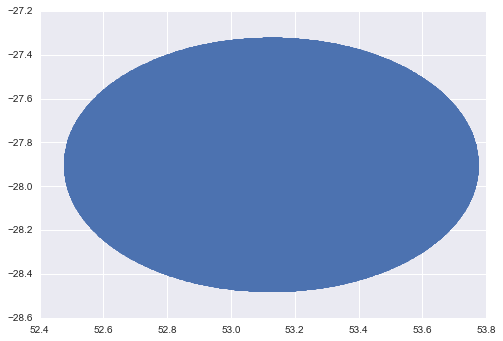

In [70]:
plt.plot(np.degrees(TwinkGalsdf.raJ2000.values), np.degrees(TwinkGalsdf.decJ2000.values), 'o')

In [105]:
TwinkGalsdf['zbin']= TwinkGalsdf['redshift'] // 0.1

In [106]:
zmids = np.arange(0.05, (TwinkGalsdf.zbin.max()+1.)* 0.1, 0.1)
print(zmids)

[  0.05   0.15   0.25   0.35   0.45   0.55   0.65   0.75   0.85   0.95
   1.05   1.15   1.25   1.35   1.45   1.55   1.65   1.75   1.85   1.95
   2.05   2.15   2.25   2.35   2.45   2.55   2.65   2.75   2.85   2.95
   3.05   3.15   3.25   3.35   3.45   3.55   3.65   3.75   3.85   3.95
   4.05   4.15   4.25   4.35   4.45   4.55   4.65   4.75   4.85   4.95
   5.05   5.15   5.25   5.35   5.45   5.55   5.65   5.75   5.85   5.95
   6.05   6.15   6.25   6.35   6.45   6.55   6.65   6.75   6.85   6.95
   7.05   7.15   7.25   7.35   7.45   7.55   7.65   7.75   7.85   7.95
   8.05   8.15   8.25   8.35   8.45   8.55   8.65   8.75   8.85   8.95
   9.05   9.15   9.25   9.35   9.45   9.55   9.65   9.75   9.85   9.95
  10.05  10.15  10.25  10.35  10.45  10.55  10.65  10.75  10.85  10.95
  11.05  11.15  11.25  11.35]


In [109]:
zbinnedGals = TwinkGalsdf.groupby('zbin')
binnedTwinks = pd.DataFrame({'zmids': zmids})
binnedTwinks['counts'] = zbinnedGals['redshift'].count()

In [110]:
binnedTwinks['counts']/ TwinkSmallGalsdf.groupby('zbin').zbin.count() 

0       9.595376
1      11.002433
2      10.749369
3      10.292952
4      10.453492
5      10.132806
6      10.846879
7       9.892209
8      11.309375
9      10.928628
10     10.788167
11     10.804494
12     10.317260
13     10.141524
14     10.066521
15     10.384411
16     10.129148
17      9.616305
18     10.073188
19     10.326182
20      9.826551
21     10.257897
22      9.489910
23      9.138949
24     10.205085
25     10.023285
26      9.940803
27     10.004072
28      9.864841
29      9.726895
         ...    
84           NaN
85           NaN
86           NaN
87           NaN
88           NaN
89           NaN
90           NaN
91      1.000000
92           NaN
93           NaN
94           NaN
95           NaN
96           NaN
97           NaN
98           NaN
99           NaN
100          NaN
101          NaN
102          NaN
103          NaN
104          NaN
105          NaN
106          NaN
107          NaN
108          NaN
109          NaN
110          NaN
111          N

(0.0, 1.4)

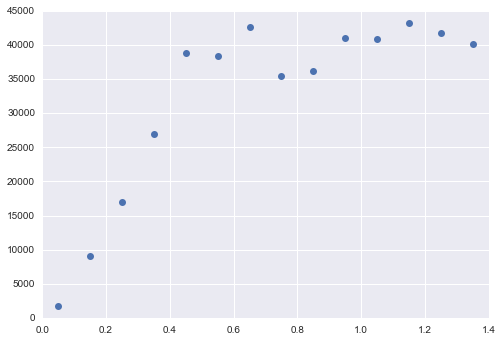

In [43]:
fig, ax = plt.subplots()
ax.errorbar(binnedTwinks.zmids, binnedTwinks.counts, np.sqrt(binnedTwinks.counts), fmt='o' )
ax.set_xlim(0., 1.4)

## SN light Curves

In [44]:
import sncosmo
import gedankenLSST

In [45]:
lsstchar = gedankenLSST.LSSTReq

In [46]:
lsstchar['meanNumVisits'] = pd.Series(np.repeat(3650.,6), index=['u','g','r','i','z','y'])

In [47]:
lsstchar['meanNumVisits']

u    3650
g    3650
r    3650
i    3650
z    3650
y    3650
dtype: float64

In [48]:
sn = gedankenLSST.GSN_Obs(mjd_center=49530., lsstrequirements=lsstchar)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119391350>]], dtype=object)

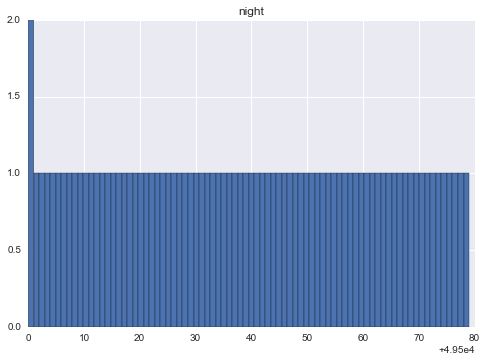

In [49]:
sndf = sn.summary
sndf[sndf['filter'] == 'u'].hist('night',bins=80)

In [50]:
s = gedankenLSST.SNObs(summarydf=sndf, t0=49530, lsst_bp=lsst_bp, ra=centralRA, dec=centralDec)

In [51]:
a = []
for z in binnedTwinks.zmids.values[:12]:
    s.snState = {'z': z}
    lc = s.lightcurve
    totalEpochs = len(lc)
    highSNRlc = lc.query('SNR > 5')
    highSNREpochs = len(highSNRlc)
    highSNREpochs_u = len(highSNRlc.query("filter == 'u'"))
    highSNREpochs_g = len(highSNRlc.query("filter == 'g'"))
    highSNREpochs_r = len(highSNRlc.query("filter == 'r'"))
    highSNREpochs_i = len(highSNRlc.query("filter == 'i'"))
    highSNREpochs_z = len(highSNRlc.query("filter == 'z'"))
    highSNREpochs_y = len(highSNRlc.query("filter == 'y'"))
    
    a.append([z, highSNREpochs, highSNREpochs_u, highSNREpochs_g, highSNREpochs_r, highSNREpochs_i, highSNREpochs_z,
              highSNREpochs_y, totalEpochs, -2.5 * np.log10(s.SN.get('x0'))])

426
438
450
462
474
480
480
480
480
480
480
480


/Users/rbiswas/.local/lib/python2.7/site-packages/gedankenLSST/sninLSST.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['SNR'] = df['flux'] / df['fluxerr']


In [52]:
FlatzSummary  = pd.DataFrame(a, columns=['redshift', 'highSNREpochs', 'u', 'g', 'r', 'i', 'z', 'y', 'totalEpochs', 'mB'])

In [53]:
FlatzSummary['frac'] = FlatzSummary.highSNREpochs / FlatzSummary.totalEpochs

In [54]:
numSNperZBinDesired = NumHighSNdesired /12.
FlatzSummary['NumSNperzBin'] = numSNperZBinDesired * 3650. / 80. / FlatzSummary['frac']

In [55]:
_nsn = FlatzSummary.NumSNperzBin.replace([-np.inf, np.inf], 0.) * FlatzSummary.frac
print(_nsn.sum() * 80. / 3650.) 

2945.24311274


In [56]:
FlatzSummary['NumSNperzBin'] =  FlatzSummary['NumSNperzBin'] * (12./9.)

In [57]:
_nsn = FlatzSummary.NumSNperzBin.replace([-np.inf, np.inf], 0.) * FlatzSummary.frac
print(_nsn.sum() * 80. / 3650.) 

3926.99081699


In [58]:
FlatzSummary['numGalsperzBin'] = binnedTwinks['counts'].head(12)

In [59]:
FlatzSummary['numSNperGal'] = FlatzSummary['NumSNperzBin'] / FlatzSummary['numGalsperzBin'] 

In [60]:
FlatzSummary

,redshift,highSNREpochs,u,g,r,i,z,y,totalEpochs,mB,frac,NumSNperzBin,numGalsperzBin,numSNperGal
0,0.05,409,66,70,70,70,66,67,416,6.956935,0.983173,2.024838e+04,1660,12.197819
1,0.15,378,39,68,70,69,68,64,424,9.490474,0.891509,2.233029e+04,9044,2.469072
2,0.25,312,18,69,70,69,68,18,436,10.728750,0.715596,2.781968e+04,17027,1.633857
3,0.35,254,0,52,70,69,63,0,438,11.572595,0.579909,3.432896e+04,27019,1.270549
4,0.45,201,0,38,59,62,42,0,443,12.218191,0.453725,4.387609e+04,38772,1.131644
5,0.55,148,0,24,48,46,30,0,445,12.742532,0.332584,5.985750e+04,38454,1.556600
6,0.65,87,0,0,41,36,10,0,448,13.184282,0.194196,1.025130e+05,42574,2.407878
7,0.75,60,0,0,28,32,0,0,452,13.565828,0.132743,1.499711e+05,35424,4.233600
8,0.85,28,0,0,10,18,0,0,444,13.901397,0.063063,3.156786e+05,36190,8.722814
9,0.95,0,0,0,0,0,0,0,432,14.200651,0.000000,inf,41037,inf


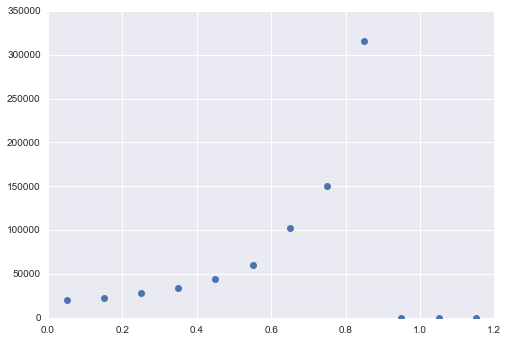

In [219]:
plt.plot(FlatzSummary.redshift, FlatzSummary['NumSNperzBin'].replace(np.inf,0), 'o')

In [61]:
model = sncosmo.Model(source='salt2')

In [62]:
from astropy.cosmology import FlatLambdaCDM

In [63]:
CatSimCosmo = FlatLambdaCDM(Om0=0.25, H0=73.)

In [64]:
alpha = 0.11
beta = -3.4
np.random.seed(42)

In [65]:
zbinsForTwinks = zbinnedGals.groups.keys()

In [77]:
_gg = zbinnedGals.get_group(zbinsForTwinks[0]).galtileid

In [86]:
sngalids  = np.random.choice(_gg, 20249, replace=True)

In [87]:
sngalids.size

20249

In [111]:
zbinnedGals = TwinkGalsdf.groupby('zbin')

In [112]:
sngalids = np.random.choice(zbinnedGals.get_group(zbinsForTwinks[0]).index.values,
                          int(FlatzSummary.NumSNperzBin[0]), replace=True)

In [113]:
sngalids

array([60014207829, 60003904217, 60006460110, ..., 60002732894,
       60004562154, 60001253036])

In [118]:
len(sngalids)

20248

In [116]:
zbinnedGals.get_group(0).ix[sngalids,'redshift']

#galtileid
60014207829    0.0860
60003904217    0.0795
60006460110    0.0956
60000459565    0.0873
60000069051    0.0806
60012988269    0.0785
60010305014    0.0767
60000845520    0.0864
60003900034    0.0783
60005417688    0.0623
60003898072    0.0760
60005475108    0.0971
60003898072    0.0760
60008748699    0.0729
60010305000    0.0767
60000184045    0.0792
60010188664    0.0645
60004566853    0.0563
60003228692    0.0666
60000001627    0.0643
60000001894    0.0793
60000041105    0.0790
60000004640    0.0574
60010188664    0.0645
60010146866    0.0452
60000113807    0.0791
60000113757    0.0790
60001850822    0.0570
60016346610    0.0702
60000069029    0.0873
                ...  
60002225958    0.0357
60000292861    0.0792
60005416248    0.0751
60010146799    0.0452
60002271204    0.0792
60012988482    0.0785
60000832267    0.0615
60001039017    0.0887
60000066247    0.0705
60000068948    0.0841
60000113872    0.0806
60000005867    0.0981
60001880440    0.0938
60000004704    0.0588

In [ ]:
np.random.choice()

In [161]:
(sngroups.count() > 0).index.values

array([60000000149, 60000000151, 60000000154, ..., 60016757621,
       60016769648, 60017086166])

In [162]:
100000000000*100*23

230000000000000

In [190]:
def assignIds(snwithHosts, maxval=100000000000):
    snwithHosts['offset'] = 0
    sngroups = snwithHosts.groupby('galtileid')
    for host in (sngroups.count() > 0).index.values:
        sn = sngroups.get_group(host)
        idx  = sn.index
        snwithHosts.loc[idx, 'offset'] = np.arange(len(sn)) *100* maxval
    return None

In [197]:
def assignSNHosts(galdf, numSN, seed):
    if seed is not None:
        np.random.seed(seed)
    sngalids = np.random.choice(galdf.index.values, numSN, replace=True)
    zvals = galdf.ix[sngalids,'redshift']
    df = pd.DataFrame({'galtileid': sngalids, 
                      'redshift' : zvals.values})
    return df

In [191]:
snhosts = assignSNHosts(zbinnedGals.get_group(0), 20249, seed=42)

In [194]:
snhosts.tail()

,galtileid,redshift,offset
20244,60000113977,0.0807,70000000000000
20245,60006453463,0.0977,190000000000000
20246,60000069003,0.0834,130000000000000
20247,60000002063,0.0811,120000000000000
20248,60000001539,0.0589,130000000000000


In [192]:
snhostids = assignIds(snhosts)

In [139]:
snhosts['offset'] = int(0)

In [133]:
sngroups = snhosts.groupby('galtileid')

In [141]:
sngroups.count().index.values

array([60000000149, 60000000151, 60000000154, ..., 60016757621,
       60016769648, 60017086166])

In [146]:
snhosts.ix[3229, 'galtileid']

60000000149

In [151]:
snhosts.loc[sngroups.get_group(60000000149).index, 'offset'] = 20

In [152]:
snhosts.offset.max()

20

In [156]:
maxval = 100000000000*100


In [158]:
snhosts.offset.max()

10000000000022

In [221]:
def assignSN(zbinnedGals, SNzSummary, binList=[0, 1], maxval=100000000000*100, seed=42):
    
    dfs = []
    for idx in binList:
        galdf = zbinnedGals.get_group(idx)
        numSN = SNzSummary.NumSNperzBin[idx]
        if idx == 0 :
            snWithHosts = assignSNHosts(galdf, numSN, seed)
        else:
            snWithHosts = assignSNHosts(galdf, numSN, seed=None)
        assignIds(snWithHosts, maxval=maxval)
        dfs.append(snWithHosts)
    return pd.concat(dfs)

In [222]:
snvals = assignSN(zbinnedGals, FlatzSummary, binList=[0, 1, 2, 3, 4, 5, 6, 7, 8])

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [233]:
snvals['snid'] = snvals['galtileid'] + snvals['offset']

In [232]:
id.drop_duplicates().size == id.size

True

In [240]:
t =snvals.set_index(snvals['snid'], drop=True, verify_integrity=True)

In [248]:
t.columns

Index([u'galtileid', u'redshift', u'offset', u'snid'], dtype='object')

In [241]:
t.to_csv('snvals.dat')

In [258]:
def assigSNParams(sntable, seed=42, cosmo=None, T0Min=0., T0Max=3650.):
    model = sncosmo.Model(source='salt2')
    CatSimCosmo = FlatLambdaCDM(Om0=0.25, H0=73.)
    numSN = len(sntable)
    zvals = sntable.redshift.values
    cvals = np.random.normal(0., 0.1, size=numSN)
    x1vals = np.random.normal(0., 1.0, size=numSN)
    M  = np.random.normal(-19.3, 0.15, size=numSN)
    M += -alpha * x1vals - beta * cvals 
    t0 = np.random.uniform(T0Min, T0Max, size=numSN)
    x0 = np.zeros(numSN)
    mB = np.zeros(numSN)
    for i, Mabs in enumerate(M):
        model.set(z=zvals[i], c=cvals[i], x1=x1vals[i])
        model.set_source_peakabsmag(Mabs, 'bessellB', 'ab')
        x0[i] = model.get('x0')
        mB[i] = model.source.peakmag('bessellB', 'ab')
    sntable['t0'] = t0
    sntable['c'] = cvals
    sntable['x1'] = x1vals
    sntable['x0'] = x0
    sntable['mB'] = mB
    sntable['M'] = M
    

In [ ]:
assigSNParams(sntable=t, cosmo=None)

In [226]:
np.random.seed(42)

In [49]:
zvals = np.random.uniform(0., 0.1, size=numSN)
cvals = np.random.normal(0., 0.1, size=numSN)
x1vals = np.random.normal(0., 1.0, size=numSN)
M  = -19.3 - alpha * x1vals - beta * cvals
mB = np.zeros(numSN)
x0 = np.zeros(numSN)
t0 = np.random.uniform(0, 3650,numSN)
for i, Mabs in enumerate(M):
    model.set(z=zvals[i], c=cvals[i], x1=x1vals[i])
    model.set_source_peakabsmag(M[i], "bessellB", 'ab', cosmo=CatSimCosmo)
    x0[i] = model.get('x0')
    mB[i] = model.source.peakmag('bessellB', 'ab')

(array([  9.,  10.,  13.,  13.,   8.,  10.,  17.,  10.,   7.,  13.,   6.,
         13.,   6.,  11.,   6.,   8.,   9.,   7.,  10.,  11.,  14.,   9.,
         10.,  13.,  10.,  10.,   7.,   8.,  11.,  18.,   7.,   8.,   5.,
         13.,  12.,  16.,  13.,  10.,  10.,   9.,  11.,   8.,   7.,   9.,
         15.]),
 array([    0.,    80.,   160.,   240.,   320.,   400.,   480.,   560.,
          640.,   720.,   800.,   880.,   960.,  1040.,  1120.,  1200.,
         1280.,  1360.,  1440.,  1520.,  1600.,  1680.,  1760.,  1840.,
         1920.,  2000.,  2080.,  2160.,  2240.,  2320.,  2400.,  2480.,
         2560.,  2640.,  2720.,  2800.,  2880.,  2960.,  3040.,  3120.,
         3200.,  3280.,  3360.,  3440.,  3520.,  3600.]),
 <a list of 45 Patch objects>)

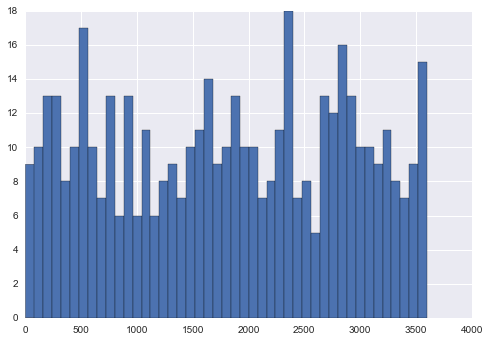

In [211]:
plt.hist(t0, bins=np.arange(0., 3650., 80))

(array([  1.,   0.,   0.,   2.,   5.,  19.,  19.,  32.,  52.,  48.,  56.,
         60.,  65.,  39.,  32.,  15.,   7.,   7.,   4.,   2.]),
 array([-3.48080883, -3.15851787, -2.83622691, -2.51393595, -2.19164499,
        -1.86935403, -1.54706307, -1.22477212, -0.90248116, -0.5801902 ,
        -0.25789924,  0.06439172,  0.38668268,  0.70897364,  1.0312646 ,
         1.35355556,  1.67584652,  1.99813747,  2.32042843,  2.64271939,
         2.96501035]),
 <a list of 20 Patch objects>)

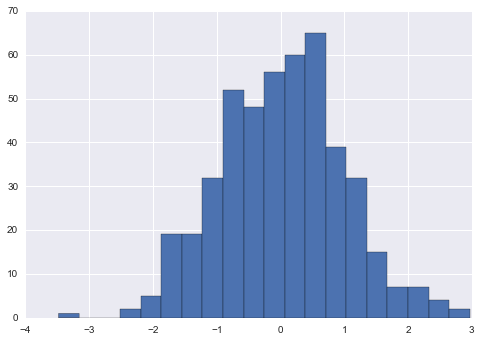

In [192]:
plt.hist(x1vals, bins=20)

# Scratch





In [91]:
s.snState = {'z':0.05}

In [120]:
slc = s.lightcurve
lcs = s.lightcurve.groupby("filter")

426
426


In [157]:
slc['mag'] = -2.5 * np.log10(slc['flux'])
slc.query('SNR > 5.').groupby("filter").mag.max()

filter
g    24.573738
i    23.276541
r    23.278776
u    22.237685
y    21.764326
z    21.746094
Name: mag, dtype: float64

In [93]:
bands = lcs.groups.keys()
lc = lcs.get_group('g')
lc = lc.sort('time')
#lc.time = lc.time - 49530

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [94]:
s.SN.mintime()

49509.0

In [99]:
np.log10

<ufunc 'log10'>

In [121]:
slc['mag'] = -2.5 * np.log10(slc['flux'])

In [122]:
slc.head()

,time,filter,ra,dec,fiveSigmaDepth,fieldID,night,band,flux,fluxerr,zp,zpsys,SNR,mag
10,49509.876543,g,0,0,25,1,49509,g,2.848210e-11,1.978642e-11,0,ab,1.439477,26.363570
11,49510.864198,g,0,0,25,1,49510,g,1.480828e-10,2.014232e-11,0,ab,7.351826,24.573738
12,49511.851852,g,0,0,25,1,49511,g,3.136994e-10,2.062501e-11,0,ab,15.209659,23.758716
13,49512.839506,g,0,0,25,1,49512,g,8.919576e-10,2.222832e-11,0,ab,40.127080,22.624139
14,49513.827160,g,0,0,25,1,49513,g,3.267843e-09,2.786386e-11,0,ab,117.278933,21.214347


In [125]:
_t = slc.query('SNR > 5')
resids = _t.mag < _t.fiveSigmaDepth
print all(resids)
#print (resids.min(), resids.max())

True


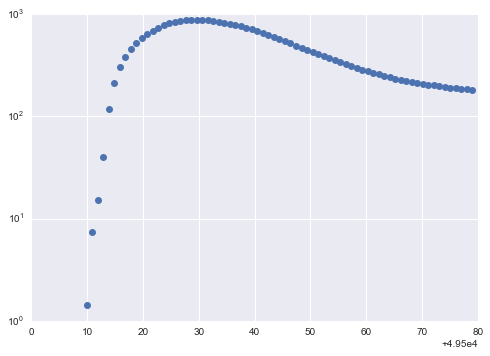

In [154]:
plt.plot(lc.time, lc.flux / lc.fluxerr, 'o')
plt.yscale('log')

In [155]:
sn.SN.maxtime()

AttributeError: 'GSN_Obs' object has no attribute 'SN'

In [164]:
binnedData['counts'].head(12)

0    172
Name: counts, dtype: float64